In [1]:
#This is an example of how to use CardioPy

In [2]:
# set interactive plotting in jupyter
%matplotlib notebook

In [3]:
import os

In [4]:
# change directory to where you have saved CardioPy
os.chdir("Z:/DropBox/Natasha/codes/CardioPy/cardiopy")

In [5]:
import numpy as np
import pandas as pd
# import EKG class
from ekg import EKG

In [6]:
# specify data files & save directory
# name of csv file containing ekg data
fname = 'HCXXX_2001-01-01_awake_cycle1_epoch1_222000.csv'
# path to csv file
fpath = 'Z:/DropBox/JackieToNatasha/python_packaging/example_run'
# directory in which to save any output
savedir = 'Z:/DropBox/JackieToNatasha/python_packaging/example_run/exported_data'

In [7]:
#create the object 'e'
%time e = EKG(fname = fname, fpath = fpath, detect_peaks=True, upshift=4.7, mw_size=60)

EKG successfully imported.
Calculating moving average with 60 ms window and a 4.7% upshift...
Detecting R peaks...
R peak detection complete
R-R intervals calculated
Wall time: 4.19 s


In [8]:
# print metadata if interested 
e.metadata

{'file_info': {'in_num': 'HCXXX',
  'fname': 'HCXXX_2001-01-01_awake_cycle1_epoch1_222000.csv',
  'path': 'Z:/DropBox/JackieToNatasha/python_packaging/example_run\\HCXXX_2001-01-01_awake_cycle1_epoch1_222000.csv',
  'start_date': '2001-01-01',
  'sleep_stage': 'awake',
  'cycle': 'cycle1',
  'epoch': 'epoch1',
  'start_time': Timestamp('2001-01-01 22:20:00')},
 'analysis_info': {'s_freq': 250.0,
  'cycle_len_secs': 299.996,
  'NaNs(samples)': 12500,
  'NaNs(secs)': 50.0,
  'smooth': False,
  'mw_size': 60,
  'upshift': 4.7}}

<IPython.core.display.Javascript object>


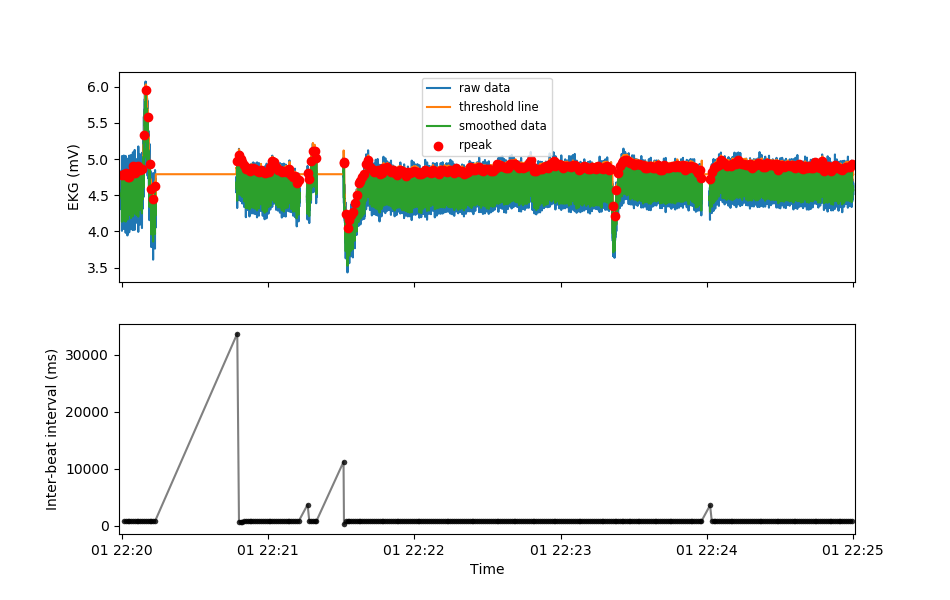

In [27]:
#visualise the EKG object
e.plotpeaks()

In [9]:
# If signal too noisey can smooth the signal by recreating the object with smooth parameter
%time e = EKG(fname = fname, fpath = fpath, detect_peaks=True, upshift=4.7, mw_size=60, smooth = True, sm_wn = 20)

EKG successfully imported.
Calculating moving average with 60 ms window and a 4.7% upshift...
Detecting R peaks...
R peak detection complete
R-R intervals calculated
Wall time: 3.96 s


<IPython.core.display.Javascript object>


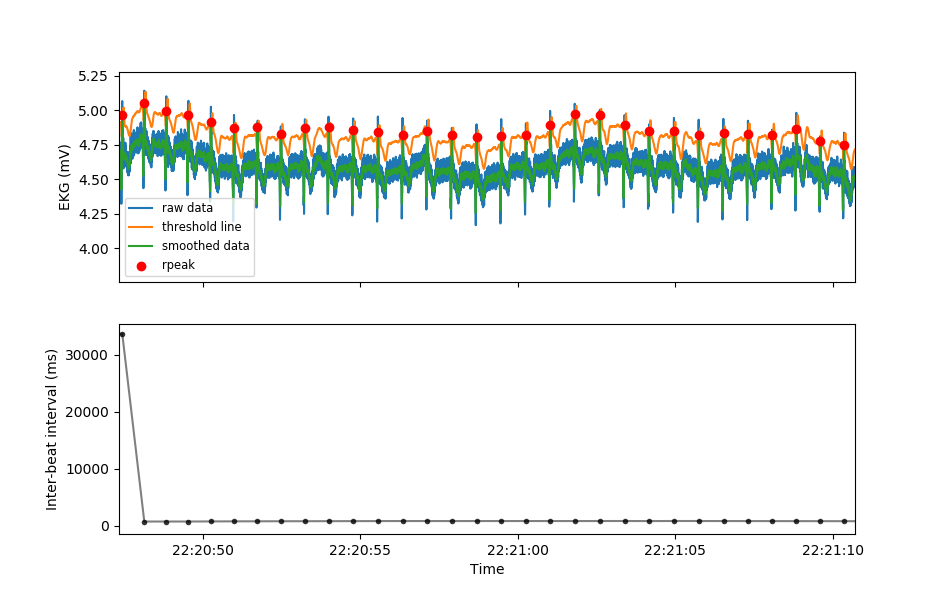

In [14]:
#visualise the smoothed EKG object
e.plotpeaks()

### Remove peaks example

<IPython.core.display.Javascript object>


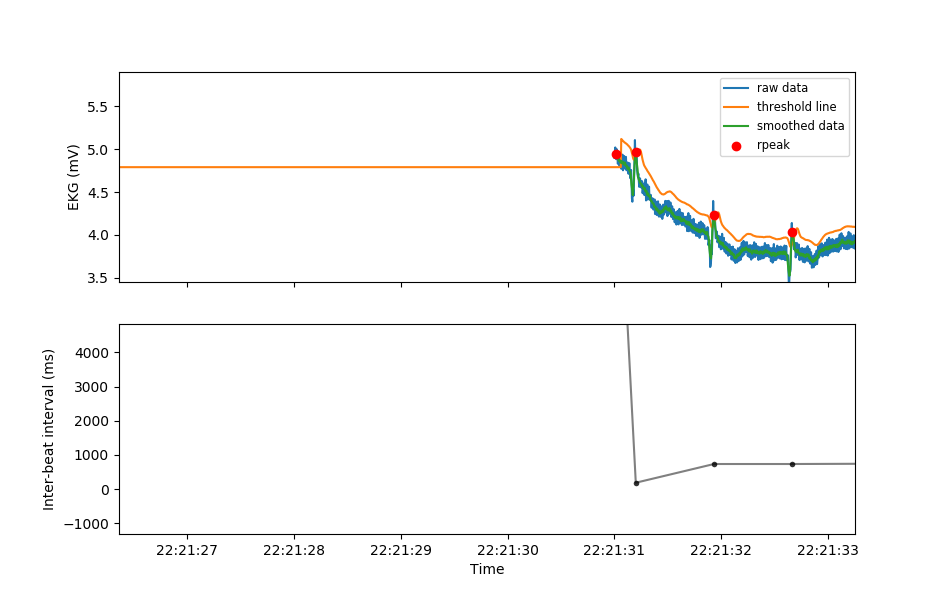

In [15]:
# examine peak detections
e.plotpeaks()

In [10]:
# call rm_peaks method with hh:mm:ss string where false peaks occur. ibi_ms listed corresponds to time of
# IBI leading up to R peak
e.rm_peaks('22:21:31')

id 	 time 				 ibi_ms
1 	 2001-01-01 22:21:31.016000 	 11192.0
2 	 2001-01-01 22:21:31.200000 	 184.0
3 	 2001-01-01 22:21:31.932000 	 732.0
Rpeaks to remove [list ids or None]: 1


R peak at  2001-01-01 22:21:31.016000  successfully removed.
ibi values recalculated.


<IPython.core.display.Javascript object>


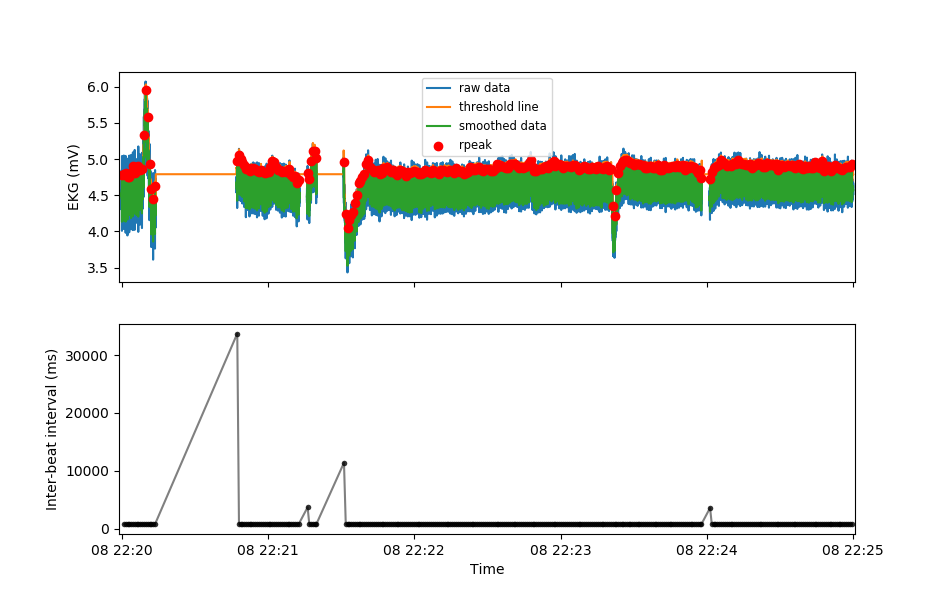

In [36]:
# re-plot to ensure that the correct peaks were removed
e.plotpeaks()
# Close window when done using the off button in the top right.
# Note : Can also undo remove peak with e.undo_rm_peak()

In [37]:
# save point to local variables
rpeaks, rpeaks_df, rpeak_artifacts, rr, nn = e.rpeaks, e.rpeaks_df, e.rpeak_artifacts, e.rr, e.nn

In [ ]:
# roll back to save point if need be
e.rpeaks, e.rpeaks_df, e.rpeak_artifacts, e.rr, e.nn = rpeaks, rpeaks_df, rpeak_artifacts, rr, nn

### Add peaks example

<IPython.core.display.Javascript object>


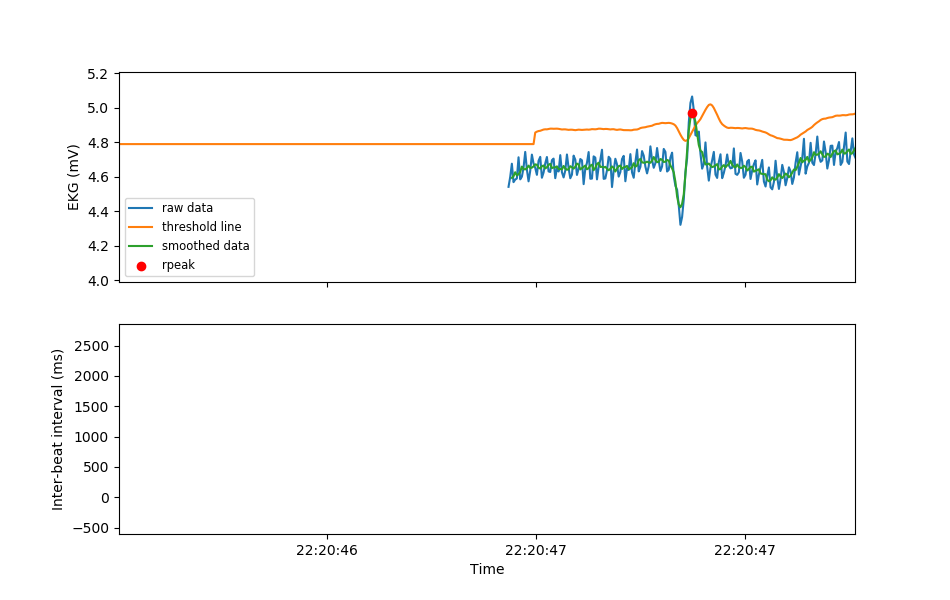

In [39]:
# 1. look at detections
e.plotpeaks()
# 2. use interaction at bottom right corner to see time of missed peaks
# 3. manually write down (on paper) millisecond range of missed peak
# 4. Close window when done using the off button in the top right.
# Note : This example is purposefully adding in a false peak. 

In [40]:
# call add_peak method with the second value of the missed peak
e.add_peak('22:20:47')

## Note: This function takes a simple local maxima in the millisecond range specified. The range can be as large
##       as you want as long as the missed peak is the highest point in the range

Millisecond range of missed peak [min:max]: 20:40
New peak added.
ibi values recalculated.


<IPython.core.display.Javascript object>


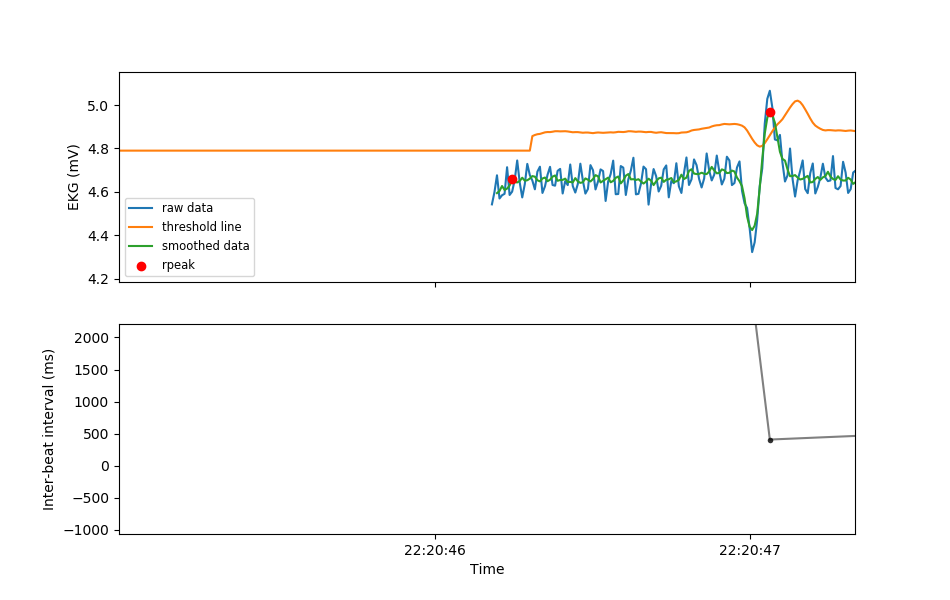

In [42]:
# check to make sure the peak was added in the correct position
e.plotpeaks()
# Close window when done using the off button in the top right.

In [10]:
# repeat as necessary

### Undo add peak example

<IPython.core.display.Javascript object>


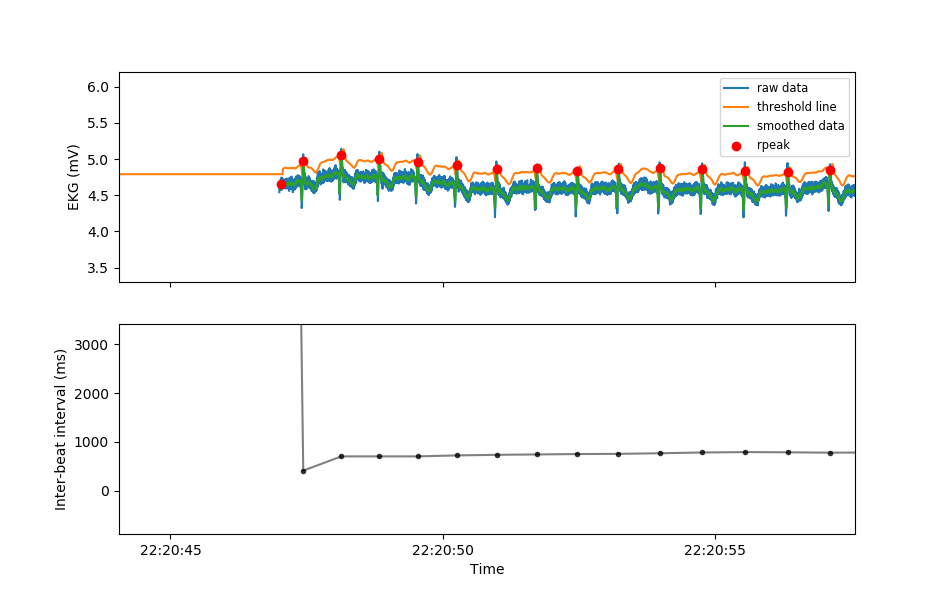

In [43]:
# 1. look at detections
e.plotpeaks()
# 2. use interaction at bottom right corner to see time of incorrectly added peak
# 3. manually write down (on paper) millisecond range of missed peak
# 4. Close window when done using the off button in the top right.
# Note : Can also undo remove peak with e.undo_rm_peak()

In [45]:
# call undo_add_peak method with the second value of the incorrectly added peak
e.undo_add_peak('22:20:47')

id 	 time
1 	 2014-04-08 22:20:47.032000
Added Rpeaks to remove [list ids or None]: 1


R peak at  DatetimeIndex(['2014-04-08 22:20:47.032000'], dtype='datetime64[ns]', freq=None)  successfully removed.
ibi values recalculated.


### Remove IBI example

In [15]:
# This code is to remove IBIs resulting from missing data due to manual data cleaning. It MUST be done after all false
# peaks are removed and missed peaks added, or ibi values will be incorrect.

<IPython.core.display.Javascript object>


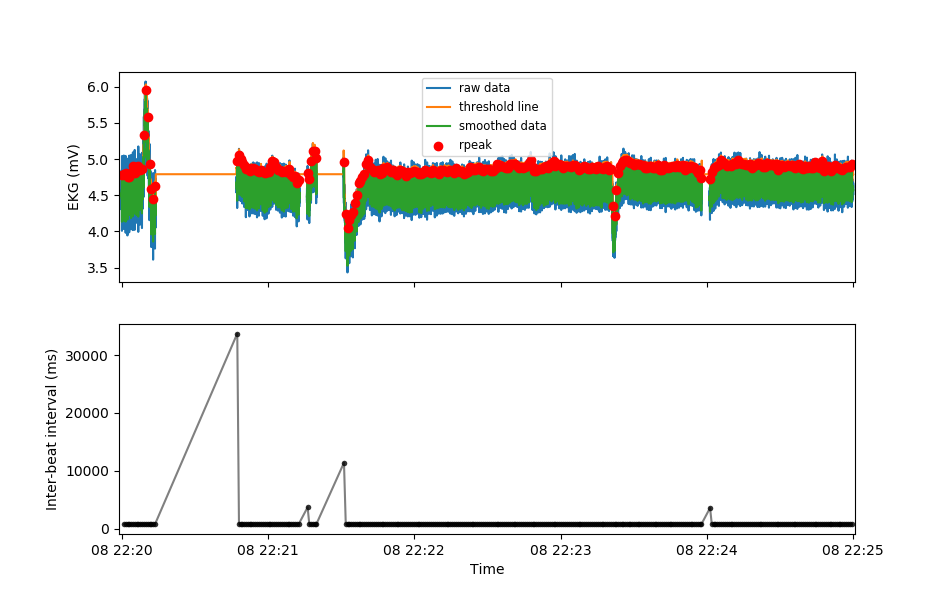

In [16]:
# inspect data for missing segments
e.plotpeaks()
# Close window when done using the off button in the top right.

In [11]:
# call rm_ibi method to remove ibis corresponding to missing data
e.rm_ibi(thres = 4000)

## Note: The threshold is set to 3000 ms (3sec). You can change this by setting the thres argument to a different number
##       when you call this function. You can do auto-ibi removal based on the threshold and/or manual ibi removal from 
##      looking at the graph. They can be done in one call or sequentially, in any order.

# Manually remove IBIs if required

IBIs greater than 4000 milliseconds detected
Automatically remove? [y/n]: y
2 IBIs removed.
ibi_artifacts series updated.
R peaks dataframe updated.

Manually remove IBIs? [y/n]: n
Done.


In [12]:
# Manually remove IBIs if desired
e.rm_ibi()

IBIs greater than 3000 milliseconds detected
Automatically remove? [y/n]: n
Manually remove IBIs? [y/n]: y
Printing IBI list...

ID 	 ibi end time 	 ibi_ms
0 	 22:20:00.936 	 752.0
1 	 22:20:01.684 	 748.0
2 	 22:20:02.436 	 752.0
3 	 22:20:03.168 	 732.0
4 	 22:20:03.900 	 732.0
5 	 22:20:04.636 	 736.0
6 	 22:20:05.384 	 748.0
7 	 22:20:06.120 	 736.0
8 	 22:20:06.868 	 748.0
9 	 22:20:07.636 	 768.0
10 	 22:20:08.384 	 748.0
11 	 22:20:09.152 	 768.0
12 	 22:20:09.920 	 768.0
13 	 22:20:10.684 	 764.0
14 	 22:20:11.452 	 768.0
15 	 22:20:12.204 	 752.0
16 	 22:20:12.968 	 764.0
17 	 22:20:13.720 	 752.0
18 	 22:20:47.440 	 nan
19 	 22:20:48.140 	 700.0
20 	 22:20:48.840 	 700.0
21 	 22:20:49.540 	 700.0
22 	 22:20:50.260 	 720.0
23 	 22:20:50.992 	 732.0
24 	 22:20:51.732 	 740.0
25 	 22:20:52.480 	 748.0
26 	 22:20:53.232 	 752.0
27 	 22:20:53.996 	 764.0
28 	 22:20:54.776 	 780.0
29 	 22:20:55.564 	 788.0
30 	 22:20:56.348 	 784.0
31 	 22:20:57.124 	 776.0
32 	 22:20:57.904 	 780.

IDs to remove [list or None]: 52, 248
2 IBIs removed.
ibi_artifacts series updated.
R peaks dataframe updated.
Done.


<IPython.core.display.Javascript object>


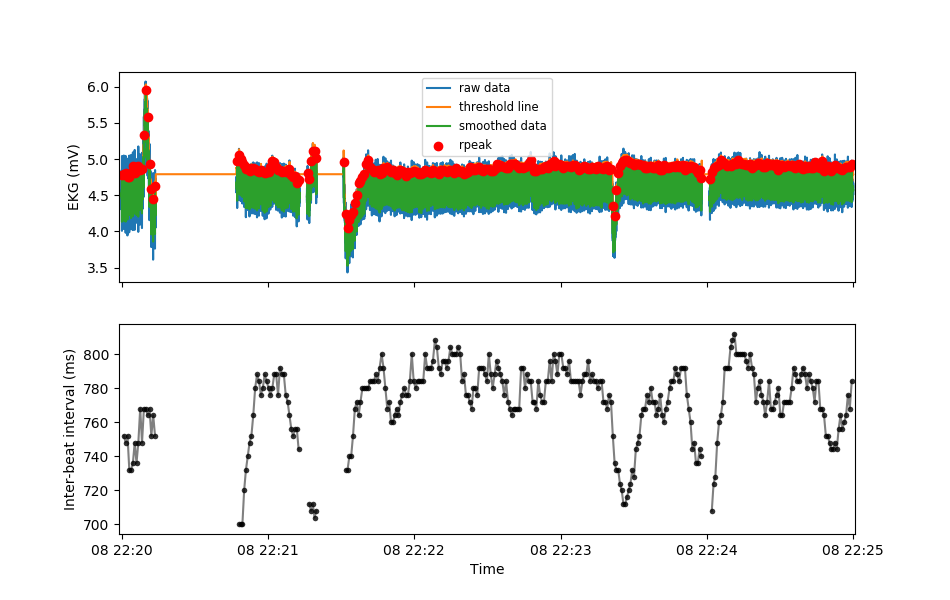

In [50]:
# inspect the data again to see if there are still false ibis present
e.plotpeaks()

### Once cleaning is complete, export data and analyze

In [13]:
e.export_RR(savedir)

Files will be saved to Z:/DropBox/JackieToNatasha/python_packaging/example_run/exported_data
R peak artifacts exported.
R peak additions exported.
R peaks exported.
IBI artifacts exported.
rr intervals exported.
nn intervals exported.
Done.


In [13]:
e.nn=e.rr

In [14]:
# Calculate time and frequency domain statistics using e.hrv_stats() or calculate them
# seperately using e.calc_fstats() and e.calc_tstats(). 
e.hrv_stats()

Calculating time domain statistics...
Time domain stats stored in obj.time_stats

Interpolating and resampling tachogram...
Calculating power spectrum...
Calculating frequency domain measures...
Frequency measures stored in obj.freq_stats

Done.


Z:\DropBox\Natasha\codes\CardioPy\cardiopy\ekg.py:906: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (1 < 3).
  pwr, freqs = psd_array_multitaper(self.ii_interp, sf_interp, adaptive=True,


<IPython.core.display.Javascript object>


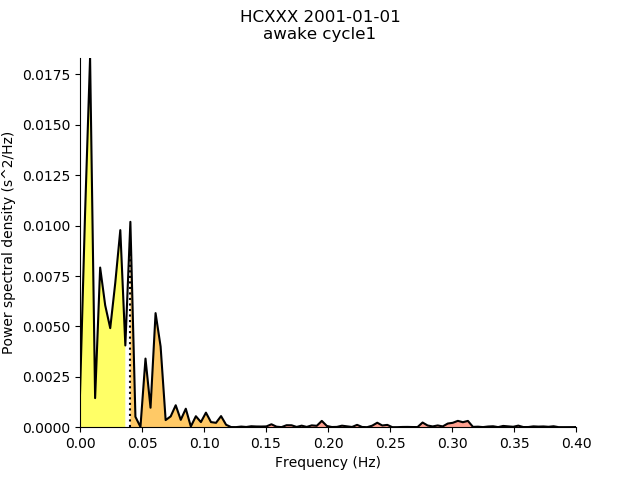

In [15]:
# plot Power spectrum with either multitaper (mt) or welch methods.
fig=e.plotPS(method='mt', savedir = savedir)

In [16]:
# Save HRV statistics to a report
e.to_report(savedir)

Files will be saved to Z:/DropBox/JackieToNatasha/python_packaging/example_run/exported_data


In [17]:
# Export data to a spreadsheet
e.to_spreadsheet(spreadsheet = 'HRV_FullClean_Stats.csv', savedir = savedir)

HRV_FullClean_Stats.csv does not exist. Data saved to new spreadsheet
